In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

# 1. Load data

In [2]:
columns = ["TimesPreg", "2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI",
    "DPF", "Age", "Target"]
pid = pd.read_csv('pima-indians-diabetes.csv', header = None)
pid.columns = columns


# 2. Explore dataset with descriptive statistics

In [3]:
pid.head()

,TimesPreg,2hrGTT,BP,Skin,2hrSerIns,BMI,DPF,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pid.shape

(768, 9)

In [5]:
pid.dtypes #all vars are numeric type

TimesPreg      int64
2hrGTT         int64
BP             int64
Skin           int64
2hrSerIns      int64
BMI          float64
DPF          float64
Age            int64
Target         int64
dtype: object

In [6]:
pid.describe().T

,count,mean,std,min,25%,50%,75%,max
TimesPreg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
2hrGTT,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2hrSerIns,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Target,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Note:
- Number of time pregnant: max is 17?
- 2hrGTT: min is 0 --> There are cases not recorded(Norm: 60-100, 1hr:<200, 2hr:<140) --> Need viz for distribution 
- BP: min is 0 --> Cases not recorded. max is 122 : in acceptable value range
- Skin: estimate amt of body fat. min = 0 --> Cases not recorded. Max = 99mm --> acceptable value???
- 2HrSerIns: normal range: 16-166(mIU/L). min =0, max = 846?
- BMI: min is 0. Max is 67?
- DBF: the higher DBF, the stronger history and genetic relationship
- Age: acceptable range
- Target: in the right value range

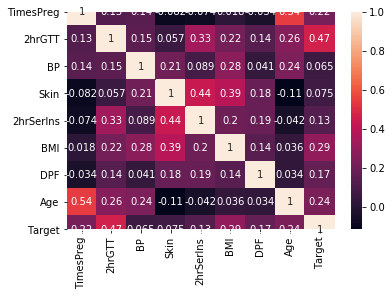

In [7]:
# Try raw dataset correlations:
corr = pid.corr()
sns.heatmap(corr, annot = True)
#need to solve: heatmap being cropped ****

#### Note:

- Target variable has a positive, medium correlation with 2hrGTT(0.47)
- Target variable has a positive, small correlation with BMI(0.29) and Age(0.24)
                    

# 3. Explore dataset by visualization

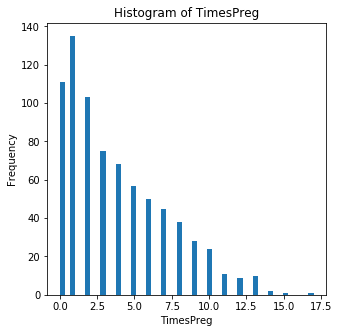

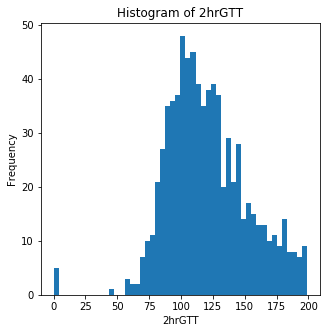

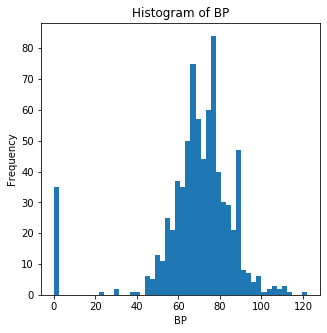

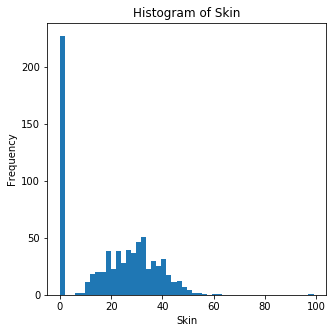

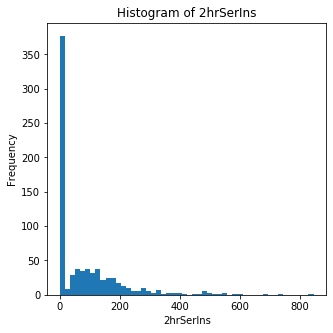

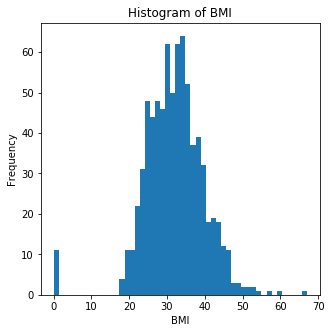

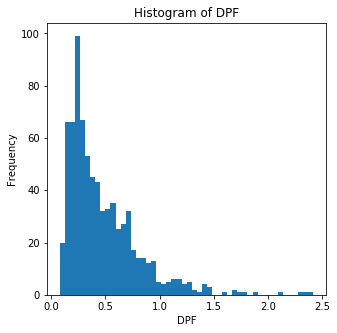

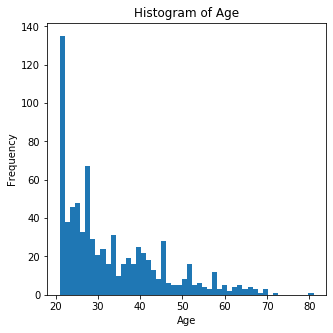

In [8]:
# Visualize variables distributions
feature_cols = pid[["TimesPreg", "2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI",
    "DPF", "Age"]]
def plot_histogram(pid, cols, bins = 50):
    for col in cols:
        fig = plt.figure(figsize=(5,5)) # define plot area
        ax = fig.gca() # define axis    
        pid[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Frequency')# Set text for y axis
        plt.show()
        
   
plot_histogram(pid, feature_cols)

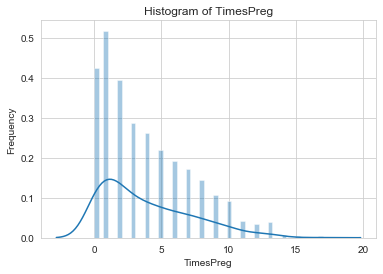

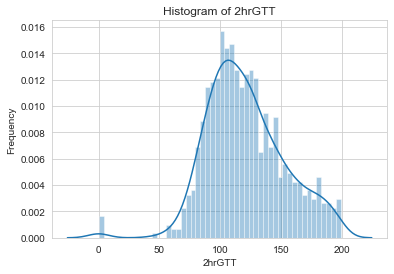

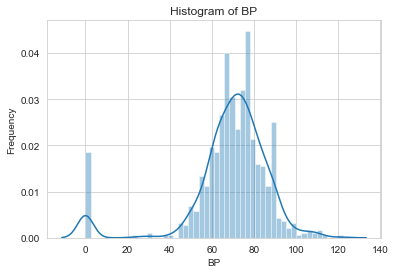

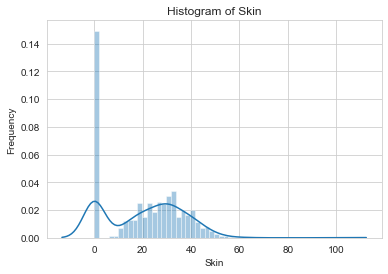

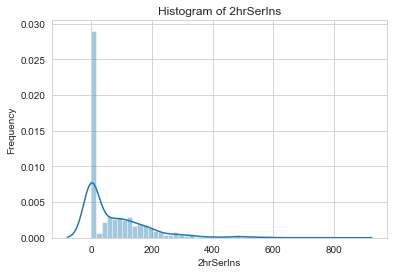

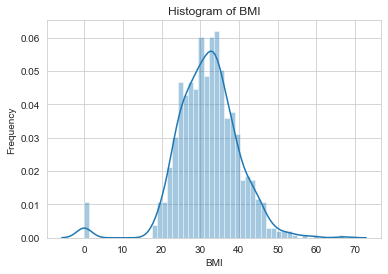

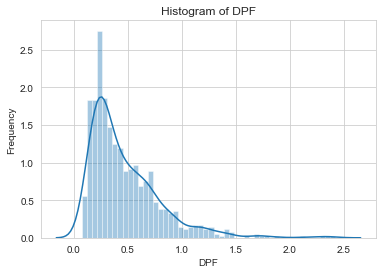

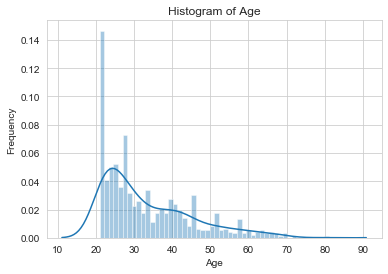

In [9]:
def plot_density_hist(pid, cols, bins = 50, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(pid[col], bins = bins, rug=False, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(pid, feature_cols) 

#### Note:
 - Number of times pregnancy: right skewed
 - 2hrGTT: approx normal distribution, except for 0 values --> extrapolate cases with 0
 - BP: approx normal distribution
 - Skin: approx normal. Many missing value --> cannot del missing value but extrapolate
 - 2hrSerIns: approx normal. Extrapolate
 - BMI: approx normal
 - DPF: Right skewed. Keep as it is
 - Age: Right skewed


# 4. Clean dataset

In [10]:
# No format inconsistency

In [11]:
# Detect and treat duplicate values
pid.duplicated().sum()

#No duplicate values

0

In [12]:
# Detect and treat missing values
# Missing values in dataset is coded as 0
# extrapolate missing values with feature's median

def clean_missing(dataset, cols):
    for col in cols:
        median_col = dataset[col].median()
        dataset[col] = dataset[col].replace(to_replace = 0, value = median_col)

    return dataset


In [13]:
clean_missing(pid, feature_cols)

,TimesPreg,2hrGTT,BP,Skin,2hrSerIns,BMI,DPF,Age,Target
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [15]:
# Check whether there're remaining value = 0 in feature variables

for col in feature_cols:
    print('Column {} has {} value = 0'.format(col,pid[col].isin([0]).sum()))

    

Column TimesPreg has 0 value = 0
Column 2hrGTT has 0 value = 0
Column BP has 0 value = 0
Column Skin has 0 value = 0
Column 2hrSerIns has 0 value = 0
Column BMI has 0 value = 0
Column DPF has 0 value = 0
Column Age has 0 value = 0


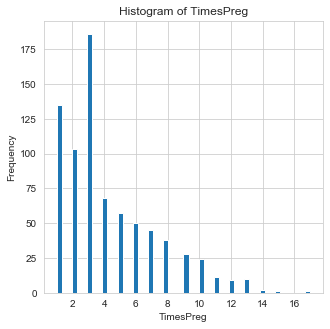

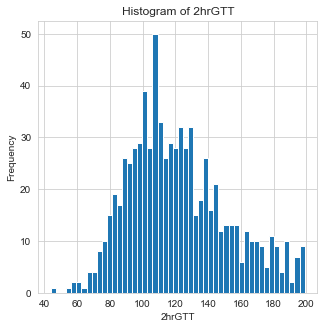

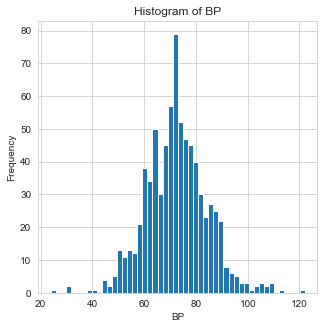

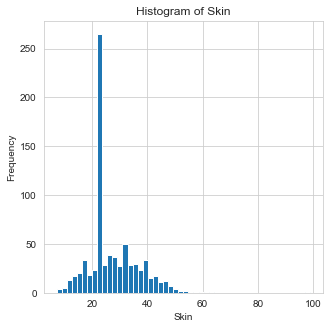

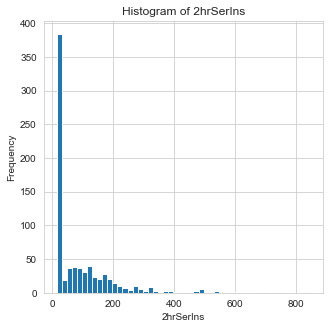

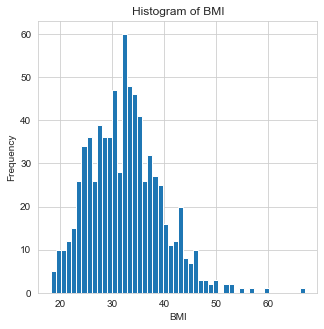

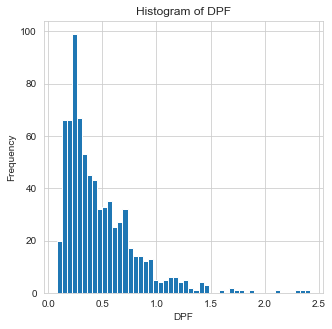

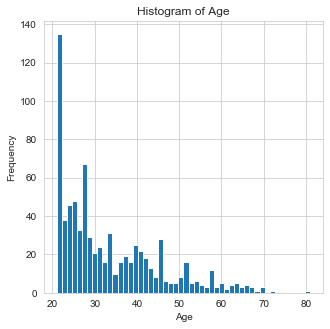

In [16]:
# Visualize to check 
plot_histogram(pid, feature_cols)